# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Setting URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#list to store pulled data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list using enumerate to log
for i, city in enumerate(cities):
        
    # Group cities in sets of 100 for logging purposes
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0

    # Create URL for each city
    city_url = url + "&q=" + city
    
    # Print out record/city count
    print(f"Processing Record {record_count} of Set {set_count}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # make the call
        city_weather = requests.get(city_url).json()

        # grabbing the data on location, temperature, humidity, etc.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # skip city if not found
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1
Processing Record 2 of Set 1
Processing Record 3 of Set 1
Processing Record 4 of Set 1
Processing Record 5 of Set 1
City not found. Skipping...
Processing Record 6 of Set 1
Processing Record 7 of Set 1
Processing Record 8 of Set 1
Processing Record 9 of Set 1
Processing Record 10 of Set 1
Processing Record 11 of Set 1
Processing Record 12 of Set 1
Processing Record 13 of Set 1
Processing Record 14 of Set 1
Processing Record 15 of Set 1
Processing Record 16 of Set 1
Processing Record 17 of Set 1
Processing Record 18 of Set 1
Processing Record 19 of Set 1
Processing Record 20 of Set 1
Processing Record 21 of Set 1
Processing Record 22 of Set 1
Processing Record 23 of Set 1
Processing Record 24 of Set 1
Processing Record 25 of Set 1
Processing Record 26 of Set 1
City not found. Skipping...
Processing Record 27 of Set 1
Processing Record 28 of Set 1
Processing Record 29 of Set 1
Processing Record 30 of

Processing Record 48 of Set 3
Processing Record 49 of Set 3
Processing Record 50 of Set 3
Processing Record 51 of Set 3
Processing Record 52 of Set 3
Processing Record 53 of Set 3
Processing Record 54 of Set 3
Processing Record 55 of Set 3
Processing Record 56 of Set 3
Processing Record 57 of Set 3
Processing Record 58 of Set 3
Processing Record 59 of Set 3
Processing Record 60 of Set 3
Processing Record 61 of Set 3
Processing Record 62 of Set 3
Processing Record 63 of Set 3
Processing Record 64 of Set 3
Processing Record 65 of Set 3
Processing Record 66 of Set 3
Processing Record 67 of Set 3
Processing Record 68 of Set 3
Processing Record 69 of Set 3
Processing Record 70 of Set 3
Processing Record 71 of Set 3
Processing Record 72 of Set 3
Processing Record 73 of Set 3
Processing Record 74 of Set 3
Processing Record 75 of Set 3
Processing Record 76 of Set 3
Processing Record 77 of Set 3
Processing Record 78 of Set 3
Processing Record 79 of Set 3
Processing Record 80 of Set 3
Processing

Processing Record 95 of Set 5
Processing Record 96 of Set 5
Processing Record 97 of Set 5
Processing Record 98 of Set 5
Processing Record 99 of Set 5
City not found. Skipping...
Processing Record 0 of Set 6
Processing Record 1 of Set 6
Processing Record 2 of Set 6
Processing Record 3 of Set 6
Processing Record 4 of Set 6
Processing Record 5 of Set 6
Processing Record 6 of Set 6
Processing Record 7 of Set 6
Processing Record 8 of Set 6
Processing Record 9 of Set 6
Processing Record 10 of Set 6
City not found. Skipping...
Processing Record 11 of Set 6
Processing Record 12 of Set 6
Processing Record 13 of Set 6
Processing Record 14 of Set 6
Processing Record 15 of Set 6
Processing Record 16 of Set 6
Processing Record 17 of Set 6
Processing Record 18 of Set 6
Processing Record 19 of Set 6
Processing Record 20 of Set 6
Processing Record 21 of Set 6
City not found. Skipping...
Processing Record 22 of Set 6
Processing Record 23 of Set 6
Processing Record 24 of Set 6
Processing Record 25 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv('output/city_data.csv', index_label = "City_ID")

In [6]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gambela,8.25,34.59,79.93,34,100,1.66,ET,1577571045
1,riberalta,-11.00,-66.08,93.20,56,75,11.41,BO,1577571045
2,avarua,-21.21,-159.78,78.80,74,100,18.34,CK,1577571046
3,bethel,60.79,-161.76,-14.80,68,1,17.22,US,1577571043
4,abnub,27.27,31.15,51.80,57,0,3.58,EG,1577571046
...,...,...,...,...,...,...,...,...,...
555,bandarbeyla,9.49,50.81,78.67,81,15,21.21,SO,1577571179
556,omboue,-1.57,9.26,76.42,92,100,1.23,GA,1577571180
557,victoria point,-27.58,153.30,81.00,47,20,9.17,AU,1577571180
558,arman,59.70,150.17,12.40,64,100,11.90,RU,1577571180


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

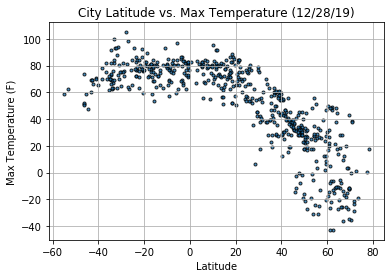

In [19]:
#Create plot
max_temps=list(city_data_df['Max Temp'])
lats=list(city_data_df['Lat'])
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker=".", 
            alpha=0.8, label="Cities")

# add in labels and grid
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

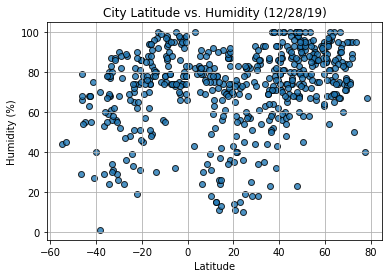

In [21]:
#Plot humidity
humidity=list(city_data_df['Humidity'])
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add in lables and grid
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

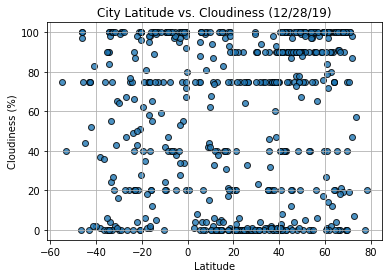

In [23]:
cloudiness=list(city_data_df['Cloudiness'])
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Grid and labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

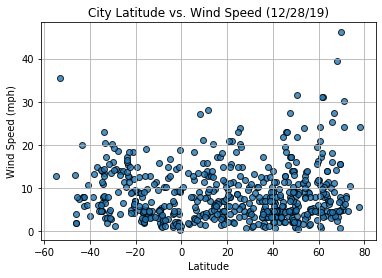

In [24]:
wind_speed=list(city_data_df['Wind Speed'])
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Grid and labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/wind.png")

# Show plot
plt.show()